In [164]:
import pandas as pd
import matplotlib as mp
import numpy as np
import scipy
import os
# from scripts.thetis.ecoscore import get_ecoscore_letter

NM_TO_KM = 1.852001
DIRNAME = os.path.abspath('')
THETIS_CSV_PATH = os.path.join(DIRNAME, "../files_computed/thetis_all_with_computed.csv")
df_all = pd.read_csv(THETIS_CSV_PATH, dtype={"imo": str})
df_ferries = df_all[df_all.ship_type.isin(["Ro-pax ship", "Passenger ship"])]
df_ferries_2019 = df_ferries[df_ferries.reporting_period == 2019]
df_ferries_2019

,Unnamed: 0,imo,name,ship_type,reporting_period,technical_efficiency,port_of_registry,home_port,ice_class,doc_issue_date,...,voluntary_reporting_additional_comments,voluntary_reporting_average_density_of_the_cargo_transported,annual_computed_distance,annual_computed_distance_km,annual_computed_pax,annual_computed_freight,annual_computed_average_speed,annual_computed_ratio_co2_from_pax,annual_computed_average_co2_emissions_per_transport_work_pax_km,computed_ecoscore_letter
12092,12092,5383304,ASTORIA,Passenger ship,2019.0,EIV (169.16 gCO₂/t·nm),NaN,NaN,NaN,15/03/2020,...,NaN,NaN,48804.089434,90385.222436,NaN,NaN,19.954570,NaN,1142.429189,E
12093,12093,6417097,MARCO POLO,Passenger ship,2019.0,EIV (68.95 gCO₂/t·nm),NaN,NaN,IC,10/03/2020,...,NaN,NaN,56504.754475,104646.861793,NaN,NaN,23.513507,NaN,352.332423,D
12094,12094,6602898,OCEAN MAJESTY,Passenger ship,2019.0,EIV (31.73 gCO₂/t·nm),Madeira,NaN,NaN,24/06/2020,...,NaN,NaN,44800.950716,82971.405527,NaN,NaN,22.499012,NaN,565.361466,D
12096,12096,7037806,IONIAN STAR,Ro-pax ship,2019.0,EIV (19.4 gCO₂/t·nm),NaN,NaN,NaN,04/08/2020,...,NaN,NaN,31988.060303,59241.919669,272.423821,219.614633,26.637554,0.750000,516.689786,D
12098,12098,7128332,SEA WIND,Ro-pax ship,2019.0,EIV (9.29 gCO₂/t·nm),Tallinn,Tallinn,IB,27/04/2020,...,NaN,NaN,49156.550243,91037.980207,46.617277,1175.941446,23.797668,0.244452,751.489875,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23382,23382,9824289,COLOR HYBRID,Ro-pax ship,2019.0,EEDI (24.78 gCO₂/t·nm),Sandefjord,NaN,IB,30/04/2020,...,NaN,NaN,19178.805247,35519.166496,568.544406,340.805934,26.796806,0.760000,300.977159,D
23383,23383,9824564,EXPRESS 4,Ro-pax ship,2019.0,EIV (1.17 gCO₂/t·nm),Aarhus,Aarhus,NaN,30/06/2020,...,NaN,NaN,86540.493295,160273.080123,482.602865,365.797058,59.973462,0.985141,460.285929,D
23437,23437,9830111,VOLCAN DE TAGORO,Ro-pax ship,2019.0,EIV (50.96 gCO₂/t·nm),SANTA CRUZ DE TENERIFE,LAS PALMAS DE GRAN CANARIA,NaN,13/04/2020,...,NaN,NaN,38025.599099,70423.447557,139.788612,192.580563,50.079964,0.420582,894.178783,E
23498,23498,9835719,WORLD EXPLORER (OCT-19)),Passenger ship,2019.0,EEDI (17.8 gCO₂/t·nm),Madeira,Madeira,IB,27/04/2020,...,NaN,NaN,13363.180799,24748.624203,NaN,NaN,22.451805,NaN,482.634729,D


In [90]:
co2 = df_ferries_2019['annual_computed_average_co2_emissions_per_transport_work_pax_km']
co2.describe()

count      512.000000
mean       722.809536
std       2361.576047
min          0.000000
25%        185.103842
50%        327.170450
75%        572.096073
max      34015.840164
Name: annual_average_co2_emissions_per_transport_work_pax_km, dtype: float64

In [91]:
co2.quantile(0.9)

928.6366476044021

In [92]:
co2_cut = co2[co2 < co2.quantile(0.95)]
co2_cut.shape

(486,)

Text(0, 0.5, 'Ships count (486 represented)')

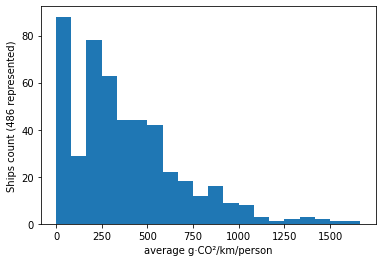

In [94]:
plot = co2_cut.plot.hist(bins=20)
plot.set_xlabel("average g·CO²/km/person")
plot.set_ylabel(f"Ships count ({len(co2_cut)} represented)")

In [135]:
counts, edges = np.histogram(co2_cut, 20)
edges

array([   0.        ,   83.27965266,  166.55930531,  249.83895797,
        333.11861063,  416.39826328,  499.67791594,  582.9575686 ,
        666.23722125,  749.51687391,  832.79652657,  916.07617922,
        999.35583188, 1082.63548454, 1165.91513719, 1249.19478985,
       1332.47444251, 1415.75409517, 1499.03374782, 1582.31340048,
       1665.59305314])

<AxesSubplot:ylabel='Density'>

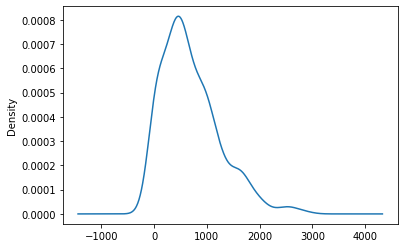

In [78]:
co2[co2 < 3000].plot.kde()

In [45]:
co2_cut.quantile([0.2, 0.4, 0.6, 0.8]) / 1.852

0.2    110.498920
0.4    254.311015
0.6    467.619870
0.8    800.114471
Name: annual_average_co2_emissions_per_transport_work_pax, dtype: float64

In [120]:
car_co2_per_km = 193
plane_co2_per_km_pax = 144.6
# cf https://www.ademe.fr/expertises/mobilite-transports/chiffres-cles-observations/chiffres-cles
thresholds = [round(car_co2_per_km / 2), round(car_co2_per_km), round(plane_co2_per_km_pax * 2), round(plane_co2_per_km_pax * 4)]
thresholds

[96, 193, 289, 578]

<AxesSubplot:>

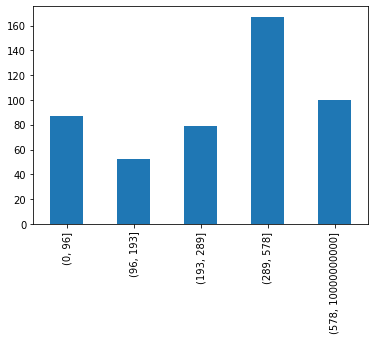

In [121]:
s = pd.cut(co2_cut, [0] + thresholds + [10**10]).value_counts(sort=False)
s
s.plot.bar()

<AxesSubplot:>

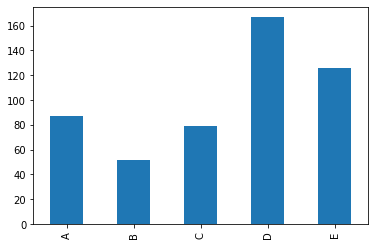

In [173]:
ecoscore_freqs = df_ferries_2019["computed_ecoscore_letter"].value_counts(sort=False)
ecoscore_freqs = ecoscore_freqs.reindex(index = ['A','B','C', 'D', 'E'])
plot = ecoscore_freqs.plot.bar()
plot.set_xlabel("Ecoscore")
plot.set_ylabel("Ships count")
